<a href="https://colab.research.google.com/github/jeftersantiago/ic_redes_complexas/blob/master/NetworkX/Simulacoes_redes_complexas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição do notebook

# Simulações
- [X] Resultado de percolação em redes complexas de Erdos-Renyi
- [ ] Reproduzir o resultado sobre o efeito de mundo pequeno de Watts e Strogatz .
- [ ] Reproduzir o resultado de resiliência a ataques aleatórios e direcionados de redes com distribuição
de grau livre de escala de Albert, Jeong e Barabási

## Bibliotecas utilizadas

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import time

## Percolação em redes complexas (Erdos-Renyi)



In [9]:
# numero de nós no grafo
n = 500 
# Lista de probabilidades p de criação de arestas.
p = np.linspace(0, 0.1, n)

# Lista com tamanho dos maiores componentes
largest_cc = []
start_time = time.time()
# Cria grafo de Erdos-Renyi para cada probabilidade p e
# armazena o valor do maior componente na lista.
for i in range(n):
    # Lista de grafos aleatorios com probabilidade p.
    er = nx.gnp_random_graph(n,p[i])
    # Tamanho do maior componente para cada probabilidade.
    largest_cc.append(len(max(nx.connected_components(er), key=len)))

# total_time = time.time() - start_time
# print("For n = ", n)
# print("--- %s seconds ---" % total_time )

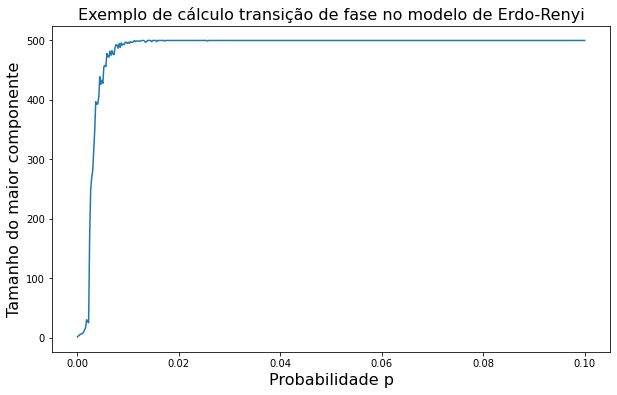

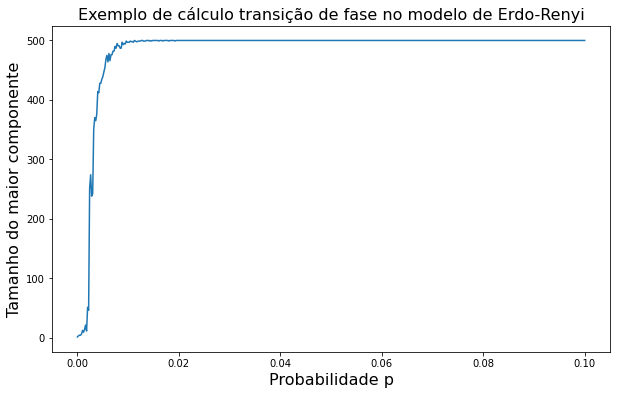

In [10]:
plt.figure(figsize=(10,6))
plt.plot(p, largest_cc)
plt.title("Exemplo de cálculo transição de fase no modelo de Erdo-Renyi", fontsize = 16)
plt.xlabel("Probabilidade p", fontsize = 16)
plt.ylabel("Tamanho do maior componente", fontsize = 16)
plt.show()

## Efeito de mundo pequeno (Strogatz-Watts)

In [11]:
n = 600
k = 6

$$ 
  L_{\text{max}} = \frac{n}{2k} \text{ e } C_{\text{max}} = \frac{3(k-2)}{4(k-1)}
$$

In [12]:
Lmax = n / (2 * k)
Cmax = (3/4) * (k - 2) / (k - 1)

print("Lmax = ", Lmax)
print("Cmax = ", Cmax)

Lmax =  50.0
Cmax =  0.6
Lmax =  50.0
Cmax =  0.6


In [13]:
# vp = np.random.uniform(size=10)
# print(vp)

In [14]:
vp = np.linspace(0, 1, 600, endpoint = True)
print("len(vp) = ", len(vp))
print(vp)

len(vp) =  600
[0.         0.00166945 0.0033389  0.00500835 0.0066778  0.00834725
 0.01001669 0.01168614 0.01335559 0.01502504 0.01669449 0.01836394
 0.02003339 0.02170284 0.02337229 0.02504174 0.02671119 0.02838063
 0.03005008 0.03171953 0.03338898 0.03505843 0.03672788 0.03839733
 0.04006678 0.04173623 0.04340568 0.04507513 0.04674457 0.04841402
 0.05008347 0.05175292 0.05342237 0.05509182 0.05676127 0.05843072
 0.06010017 0.06176962 0.06343907 0.06510851 0.06677796 0.06844741
 0.07011686 0.07178631 0.07345576 0.07512521 0.07679466 0.07846411
 0.08013356 0.08180301 0.08347245 0.0851419  0.08681135 0.0884808
 0.09015025 0.0918197  0.09348915 0.0951586  0.09682805 0.0984975
 0.10016694 0.10183639 0.10350584 0.10517529 0.10684474 0.10851419
 0.11018364 0.11185309 0.11352254 0.11519199 0.11686144 0.11853088
 0.12020033 0.12186978 0.12353923 0.12520868 0.12687813 0.12854758
 0.13021703 0.13188648 0.13355593 0.13522538 0.13689482 0.13856427
 0.14023372 0.14190317 0.14357262 0.14524207 0.14

In [15]:
vL = []
vC = []
i = 0
for p in vp:
  g = nx.watts_strogatz_graph(n, k, p)
  C =  nx.average_clustering(g) / Cmax
  L = nx.average_shortest_path_length(g) / Lmax
  vC.append(C)
  vL.append(L)
  i+=1
#  print("i = ",  i, " -> C/C(0) = ", C, " L/L(0) = ", L)

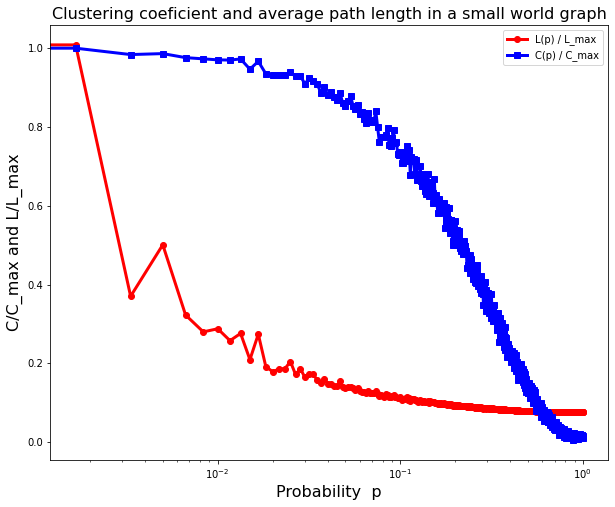

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(vp, vL, '-o', color="red", linewidth=3, label = "L(p) / L_max")
plt.plot(vp, vC, '-s', color="blue", linewidth=3, label = "C(p) / C_max")

plt.title("Clustering coeficient and average path length in a small world graph", fontsize = 16)
plt.xlabel("Probability  p", fontsize = 16)
plt.ylabel("C/C_max and L/L_max", fontsize = 16)


plt.xscale("log")

# plt.xlim([0 1.0])
# plt.ylim([0.0, 1.0])
 
plt.legend()
plt.show()

In [17]:
# '1# pos = nx.circular_layout(g)
# plt.figure(figsize=(25, 25))
# nx.draw_networkx(g, pos = pos,
#                   node_size = 1000, 
#                  font_size = 20, 
#                  node_color = "green", 
#                  font_color="whitesmoke",  
#                  edge_color = "black",
#                  width = 2)
# plt.show()

## Resiliência a ataques aleatórios e direcionados (Albert, Barabási e Jeong)

